In [1]:
import tensorflow as tf
from tensorflow import keras as keras
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [2]:
(train_images,train_labels),(test_images,test_labels) = keras.datasets.mnist.load_data()

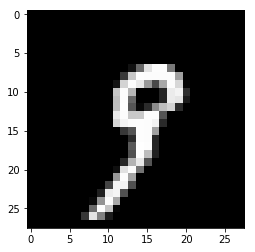

In [3]:
index = 19
img = plt.imshow(train_images[index],cmap='gray')

In [4]:
train_images = train_images.reshape(60000,28,28,1)
train_images = train_images / 255
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images / 255

In [5]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax'),
])

In [18]:
model3 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.50),
    keras.layers.Dense(10, activation='softmax'),
])

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
EPOCHS = 5
BATCH_SIZE = 128

In [8]:
history = model.fit(train_images,train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 56s 939us/sample - loss: 0.2169 - accuracy: 0.9324
Epoch 2/5
60000/60000 [==============================] - 52s 869us/sample - loss: 0.0619 - accuracy: 0.9801
Epoch 3/5
60000/60000 [==============================] - 47s 785us/sample - loss: 0.0458 - accuracy: 0.9858
Epoch 4/5
60000/60000 [==============================] - 48s 796us/sample - loss: 0.0356 - accuracy: 0.9890
Epoch 5/5
60000/60000 [==============================] - 47s 785us/sample - loss: 0.0302 - accuracy: 0.9900


In [20]:
model3.fit(train_images, train_labels, epochs=5, batch_size=256)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 44s 729us/sample - loss: 0.3937 - accuracy: 0.8789
Epoch 2/5
60000/60000 [==============================] - 43s 711us/sample - loss: 0.1182 - accuracy: 0.9651
Epoch 3/5
60000/60000 [==============================] - 42s 708us/sample - loss: 0.0839 - accuracy: 0.9752
Epoch 4/5
60000/60000 [==============================] - 43s 709us/sample - loss: 0.0693 - accuracy: 0.9791
Epoch 5/5
60000/60000 [==============================] - 44s 727us/sample - loss: 0.0606 - accuracy: 0.9815


In [21]:
model3.evaluate(test_images,test_labels)

10000/10000 [==============================] - 3s 273us/sample - loss: 0.0328 - accuracy: 0.9895


[0.03281658572664019, 0.9895]

In [9]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 3s 260us/sample - loss: 0.0237 - accuracy: 0.9915


[0.023708897832536605, 0.9915]

In [11]:
from keras.models import load_model
model.save('mnist.h5')

In [22]:
from keras.models import load_model
model3.save('mnist_three.h5')